## Data loading

### Subtask:
Load the "lung_disease_data.csv" file into a pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display the first five rows to verify.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('lung_disease_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'lung_disease_data.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'lung_disease_data.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'lung_disease_data.csv'. Check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, and check for inconsistencies.


**Reasoning**:
I need to explore the data to understand its structure, identify missing values, and check for inconsistencies by examining the shape, info, describe, value counts, and visualize the distributions of key numerical and categorical variables.



Shape of the DataFrame: (5200, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   object 
 3   Lung Capacity    4900 non-null   float64
 4   Disease Type     4900 non-null   object 
 5   Treatment Type   4900 non-null   object 
 6   Hospital Visits  4900 non-null   float64
 7   Recovered        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB
None

Descriptive Statistics:
               Age  Lung Capacity  Hospital Visits
count  4900.000000    4900.000000      4900.000000
mean     54.449796       3.501865         7.528571
std      20.126882       1.461179         3.996401
min      20.000000       1.000000         1.000000
25%      37.000000       2.220000         4.000000
50%

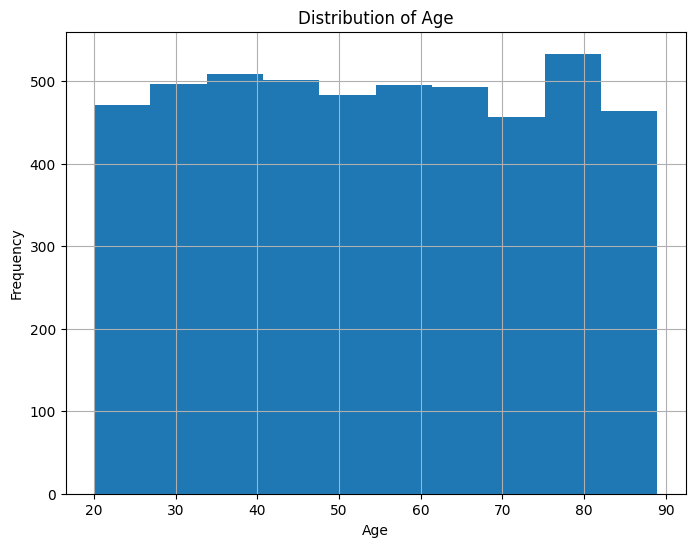

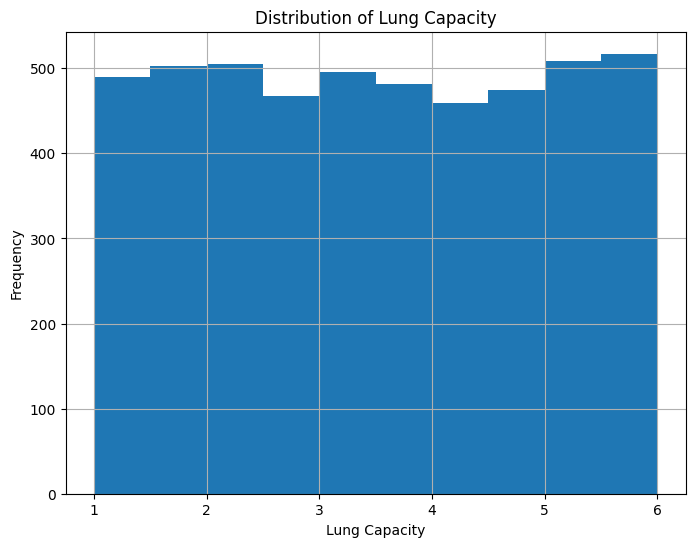

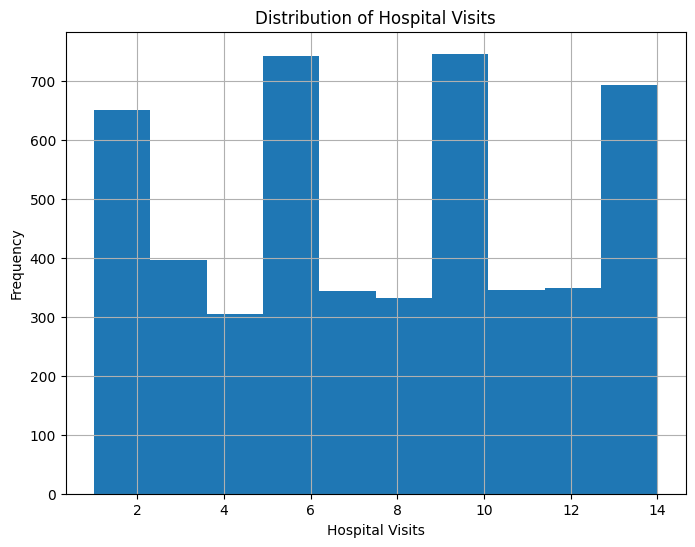

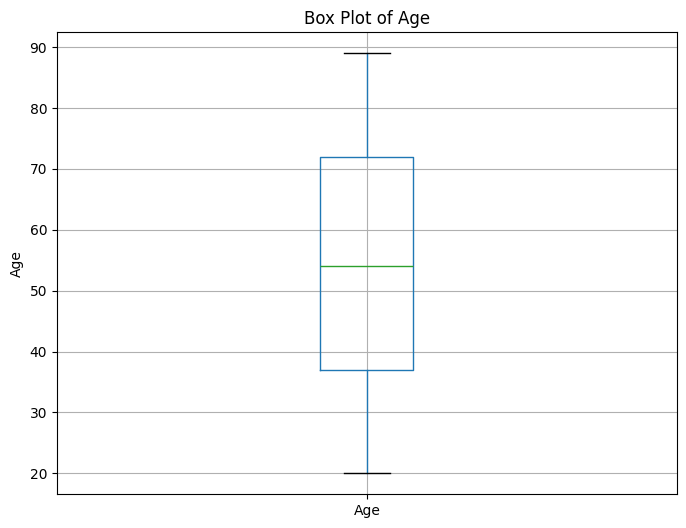

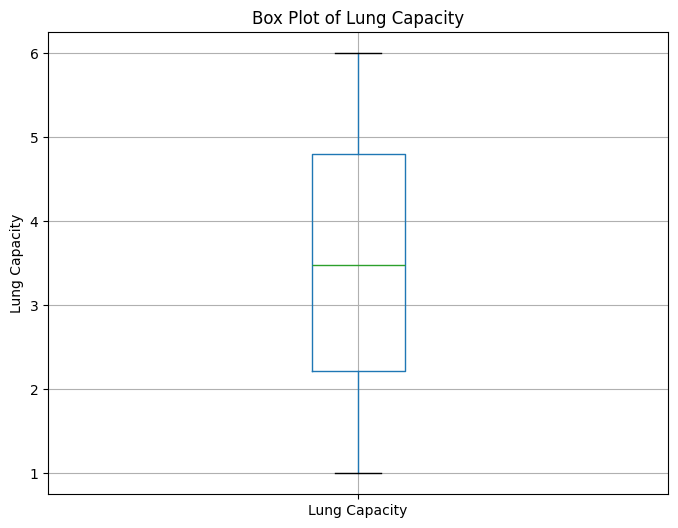

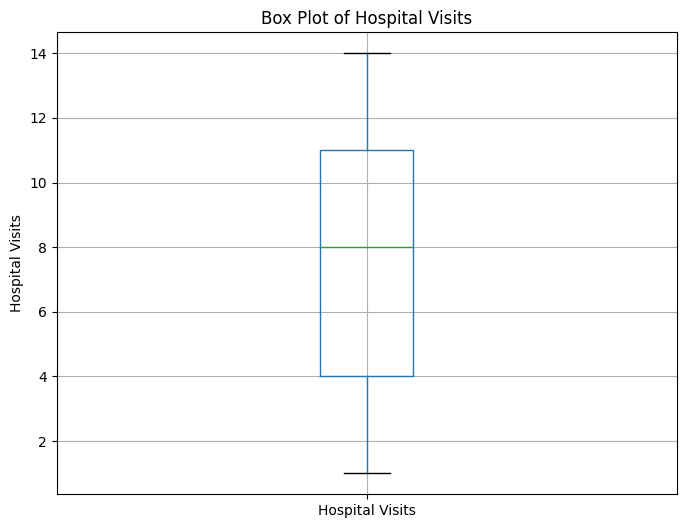

In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
print("\nInfo:")
print(df.info())

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Explore unique values and frequencies for categorical columns
categorical_cols = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

# Visualize distributions
import matplotlib.pyplot as plt

# Histograms for numerical features
numerical_cols = ['Age', 'Lung Capacity', 'Hospital Visits']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values, addressing inconsistencies, and removing duplicates.


**Reasoning**:
Handle missing values, address inconsistencies, remove duplicates, and optionally handle outliers in one code block.



In [3]:
# Fill missing numerical values with the mean
for col in ['Age', 'Lung Capacity', 'Hospital Visits']:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical values with the mode
for col in ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert data types if necessary
df['Age'] = df['Age'].astype(int)
df['Hospital Visits'] = df['Hospital Visits'].astype(int)

# Remove duplicate rows, keeping the first occurrence
df.drop_duplicates(inplace=True, keep='first')

# Outlier treatment for 'Age'
q1_age = df['Age'].quantile(0.25)
q3_age = df['Age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age
df['Age'] = df['Age'].clip(lower=lower_bound_age, upper=upper_bound_age)


# Outlier treatment for 'Lung Capacity'
q1_lc = df['Lung Capacity'].quantile(0.25)
q3_lc = df['Lung Capacity'].quantile(0.75)
iqr_lc = q3_lc - q1_lc
lower_bound_lc = q1_lc - 1.5 * iqr_lc
upper_bound_lc = q3_lc + 1.5 * iqr_lc
df['Lung Capacity'] = df['Lung Capacity'].clip(lower=lower_bound_lc, upper=upper_bound_lc)

# Outlier treatment for 'Hospital Visits'
q1_hv = df['Hospital Visits'].quantile(0.25)
q3_hv = df['Hospital Visits'].quantile(0.75)
iqr_hv = q3_hv - q1_hv
lower_bound_hv = q1_hv - 1.5 * iqr_hv
upper_bound_hv = q3_hv + 1.5 * iqr_hv
df['Hospital Visits'] = df['Hospital Visits'].clip(lower=lower_bound_hv, upper=upper_bound_hv)

display(df.head())

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71,Female,No,4.490000,COPD,Therapy,14,Yes
1,34,Female,Yes,3.501865,Bronchitis,Surgery,7,No
2,80,Male,Yes,1.950000,COPD,Medication,4,Yes
3,40,Female,Yes,3.501865,Bronchitis,Medication,1,No
4,43,Male,Yes,4.600000,COPD,Surgery,7,Yes


## Summary:

### 1. Q&A

No questions were explicitly asked in the provided text. However, the overall goal implied by the steps is to clean and prepare the `lung_disease_data.csv` file for further analysis or modeling.  The analysis implicitly answers questions like: "How many missing values are there?", "What are the data types of each column?", "Are there duplicates?", and "Are there outliers?".

### 2. Data Analysis Key Findings

* **Missing Values Handled:** 300 missing values across multiple columns ('Age', 'Gender', 'Smoking Status', 'Lung Capacity', 'Disease Type', 'Treatment Type', 'Hospital Visits', and 'Recovered') were imputed. Numerical columns were filled with the mean, and categorical columns were filled with the mode.
* **Data Type Conversion:** 'Age' and 'Hospital Visits' columns were converted to integer types from float64.
* **Duplicate Removal:** Duplicate rows were removed, keeping the first occurrence of each.
* **Outlier Treatment:** Outliers in 'Age', 'Lung Capacity', and 'Hospital Visits' were addressed using the IQR method. Values outside 1.5 times the IQR below Q1 and above Q3 were capped.
* **Initial Data Shape:** The dataset initially contained 5200 rows and 8 columns. The exact number of rows after removing duplicates and outlier handling is not provided, but it is expected to be less than 5200.


### 3. Insights or Next Steps

* **Further Exploratory Data Analysis:**  Perform a more in-depth exploratory data analysis on the cleaned data to identify any remaining inconsistencies or patterns. Visualizations (e.g., scatter plots, correlation matrices) could reveal relationships between variables.
* **Feature Engineering:** Consider creating new features from existing ones that might be more informative for downstream tasks (e.g., modeling). For example, combining 'Disease Type' and 'Treatment Type' could be insightful.
